In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install rake_nltk

In [ ]:
pip install phrasemachine

In [ ]:
pip install spacy

In [ ]:
pip install spacy_langdetect

In [ ]:
###############################################################################
### packages required to run code.  Make sure to install all required packages.
###############################################################################
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk import ngrams, FreqDist
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import TSNE

from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


import pandas as pd
import os
import numpy as np
import phrasemachine
from rake_nltk import Rake
import re
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
import gensim

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/all_annotated.tsv",sep='\t')
df.head()

,Tweet ID,Country,Date,Tweet,Definitely English,Ambiguous,Definitely Not English,Code-Switched,Ambiguous due to Named Entities,Automatically Generated Tweets
0,434215992731136000,TR,2014-02-14,Bugün bulusmami lazimdiii,0,0,1,0,0,0
1,285903159434563584,TR,2013-01-01,Volkan konak adami tribe sokar yemin ederim :D,0,0,1,0,0,0
2,285948076496142336,NL,2013-01-01,Bed,1,0,0,0,0,0
3,285965965118824448,US,2013-01-01,I felt my first flash of violence at some fool...,1,0,0,0,0,0
4,286057979831275520,US,2013-01-01,Ladies drink and get in free till 10:30,1,0,0,0,0,0


In [ ]:
df['Tweet']

0                                Bugün bulusmami lazimdiii
1           Volkan konak adami tribe sokar yemin ederim :D
2                                                      Bed
3        I felt my first flash of violence at some fool...
4                  Ladies drink and get in free till 10:30
                               ...                        
10497    I'm at @PiazzaAvym in Canik, Samsun w/ @mertar...
10498    El Nido, fica ao norte de Palawan, uma das ilh...
10499    Alhamdulillah 😊👨‍👩‍👧‍👧🎂🍦makasih mah pah #lovyu...
10500    Eid-Mubarak @ Bauchi Fedral Lowcost https://t....
10501    ⒍ Santa Catarina Pinula\n⒎ Nairo Quintana\n⒏ A...
Name: Tweet, Length: 10502, dtype: object

In [ ]:
for i in range(0, len(df['Tweet'])):
  print(df['Tweet'][i])

Streaming output truncated to the last 5000 lines.
@stylinstinto vai dormir criatura
@GabytzaBuga @HanganuSimona But maybr you will see him after, just have hope 🙏🙏😘😘
#liberidi avere paura dei 23 gradi a Roma il 30 novembre! Sto con la finestra spalancata!
no momento mexendo no celular e no telefone
We love Sully 💙 @ Disney's Hollywood Studios http://t.co/Hp4Zmw6Xc5
Sudah tak sadarkan diri sampe harus dari mana mulainya -;-
saatler geçtikçe iyi oluyorum galiba 😉 (@ Yurttaşlar Apartmanı in Manisa, Kula) https://t.co/pbqKmPIYVI
As pessoas acham q tem um direito de entrar e sair da minha vida quando querem, quando bem entenderem. Ta achando q essa porra é oq? Puteiro
💎💎💎- we don't talk anymore. Still, I hope you're enjoying life 👌
CAT look Go.
@30for30 @espn #catchingOdellMary
I'm at Universidade Nove de Julho (UNINOVE) - @uninoveoficial in São Paulo, SP https://t.co/C9xU9ogcGn
CAFFE Y VAINILLAS, ECELENTE COMBO PARA ESTE CLIMA..
Vamos que en el segundo tiempo lo damos vuelta , vamos villa

In [ ]:
df['Country']

0        TR
1        TR
2        NL
3        US
4        US
         ..
10497    TR
10498    PH
10499    ID
10500    NG
10501    GT
Name: Country, Length: 10502, dtype: object

In [ ]:
pd.unique(df['Country'])

array(['TR', 'NL', 'US', 'GB', 'RS', 'MX', 'CA', 'MY', 'BR', 'ID', 'IE',
       'RU', 'HU', 'FR', 'ES', 'CL', 'JP', 'IT', 'SE', 'BY', 'LU', 'PT',
       'BE', 'DE', 'FI', 'NO', 'CH', 'LV', 'EE', 'UA', 'AT', nan, 'ZA',
       'AM', 'XK', 'PL', 'CO', 'TH', 'AR', 'PH', 'SA', 'NG', 'IN', 'EG',
       'JO', 'EC', 'YE', 'LK', 'UY', 'KW', 'QA', 'PY', 'AU', 'SN', 'HN',
       'CN', 'PA', 'SG', 'VC', 'VE', 'TW', 'KE', 'TZ', 'TT', 'BH', 'PR',
       'PE', 'AE', 'LB', 'OM', 'PK', 'BS', 'GH', 'DO', 'UZ', 'DK', 'GR',
       'LY', 'SV', 'RE', 'MQ', 'JM', 'CR', 'KR', 'MP', 'IQ', 'IR', 'GT',
       'MN', 'GE', 'NI', 'BN', 'HK', 'DZ', 'CM', 'GI', 'RO', 'SY', 'SL',
       'IL', 'MA', 'CZ', 'AZ', 'HR', 'BW', 'NP', 'AG', 'CY', 'VN', 'TN',
       'RW', 'BA', 'NZ', 'LS', 'BO', 'NE', 'MO', 'ST', 'BG', 'FJ', 'KZ',
       'CU', 'TM', 'SD', 'AQ', 'ZM', 'KH', 'BM', 'PW'], dtype=object)

In [ ]:
df['Country'].value_counts()

US    2966
BR    1195
ID    1099
TR     624
JP     505
      ... 
AM       1
MO       1
TZ       1
RE       1
PW       1
Name: Country, Length: 128, dtype: int64

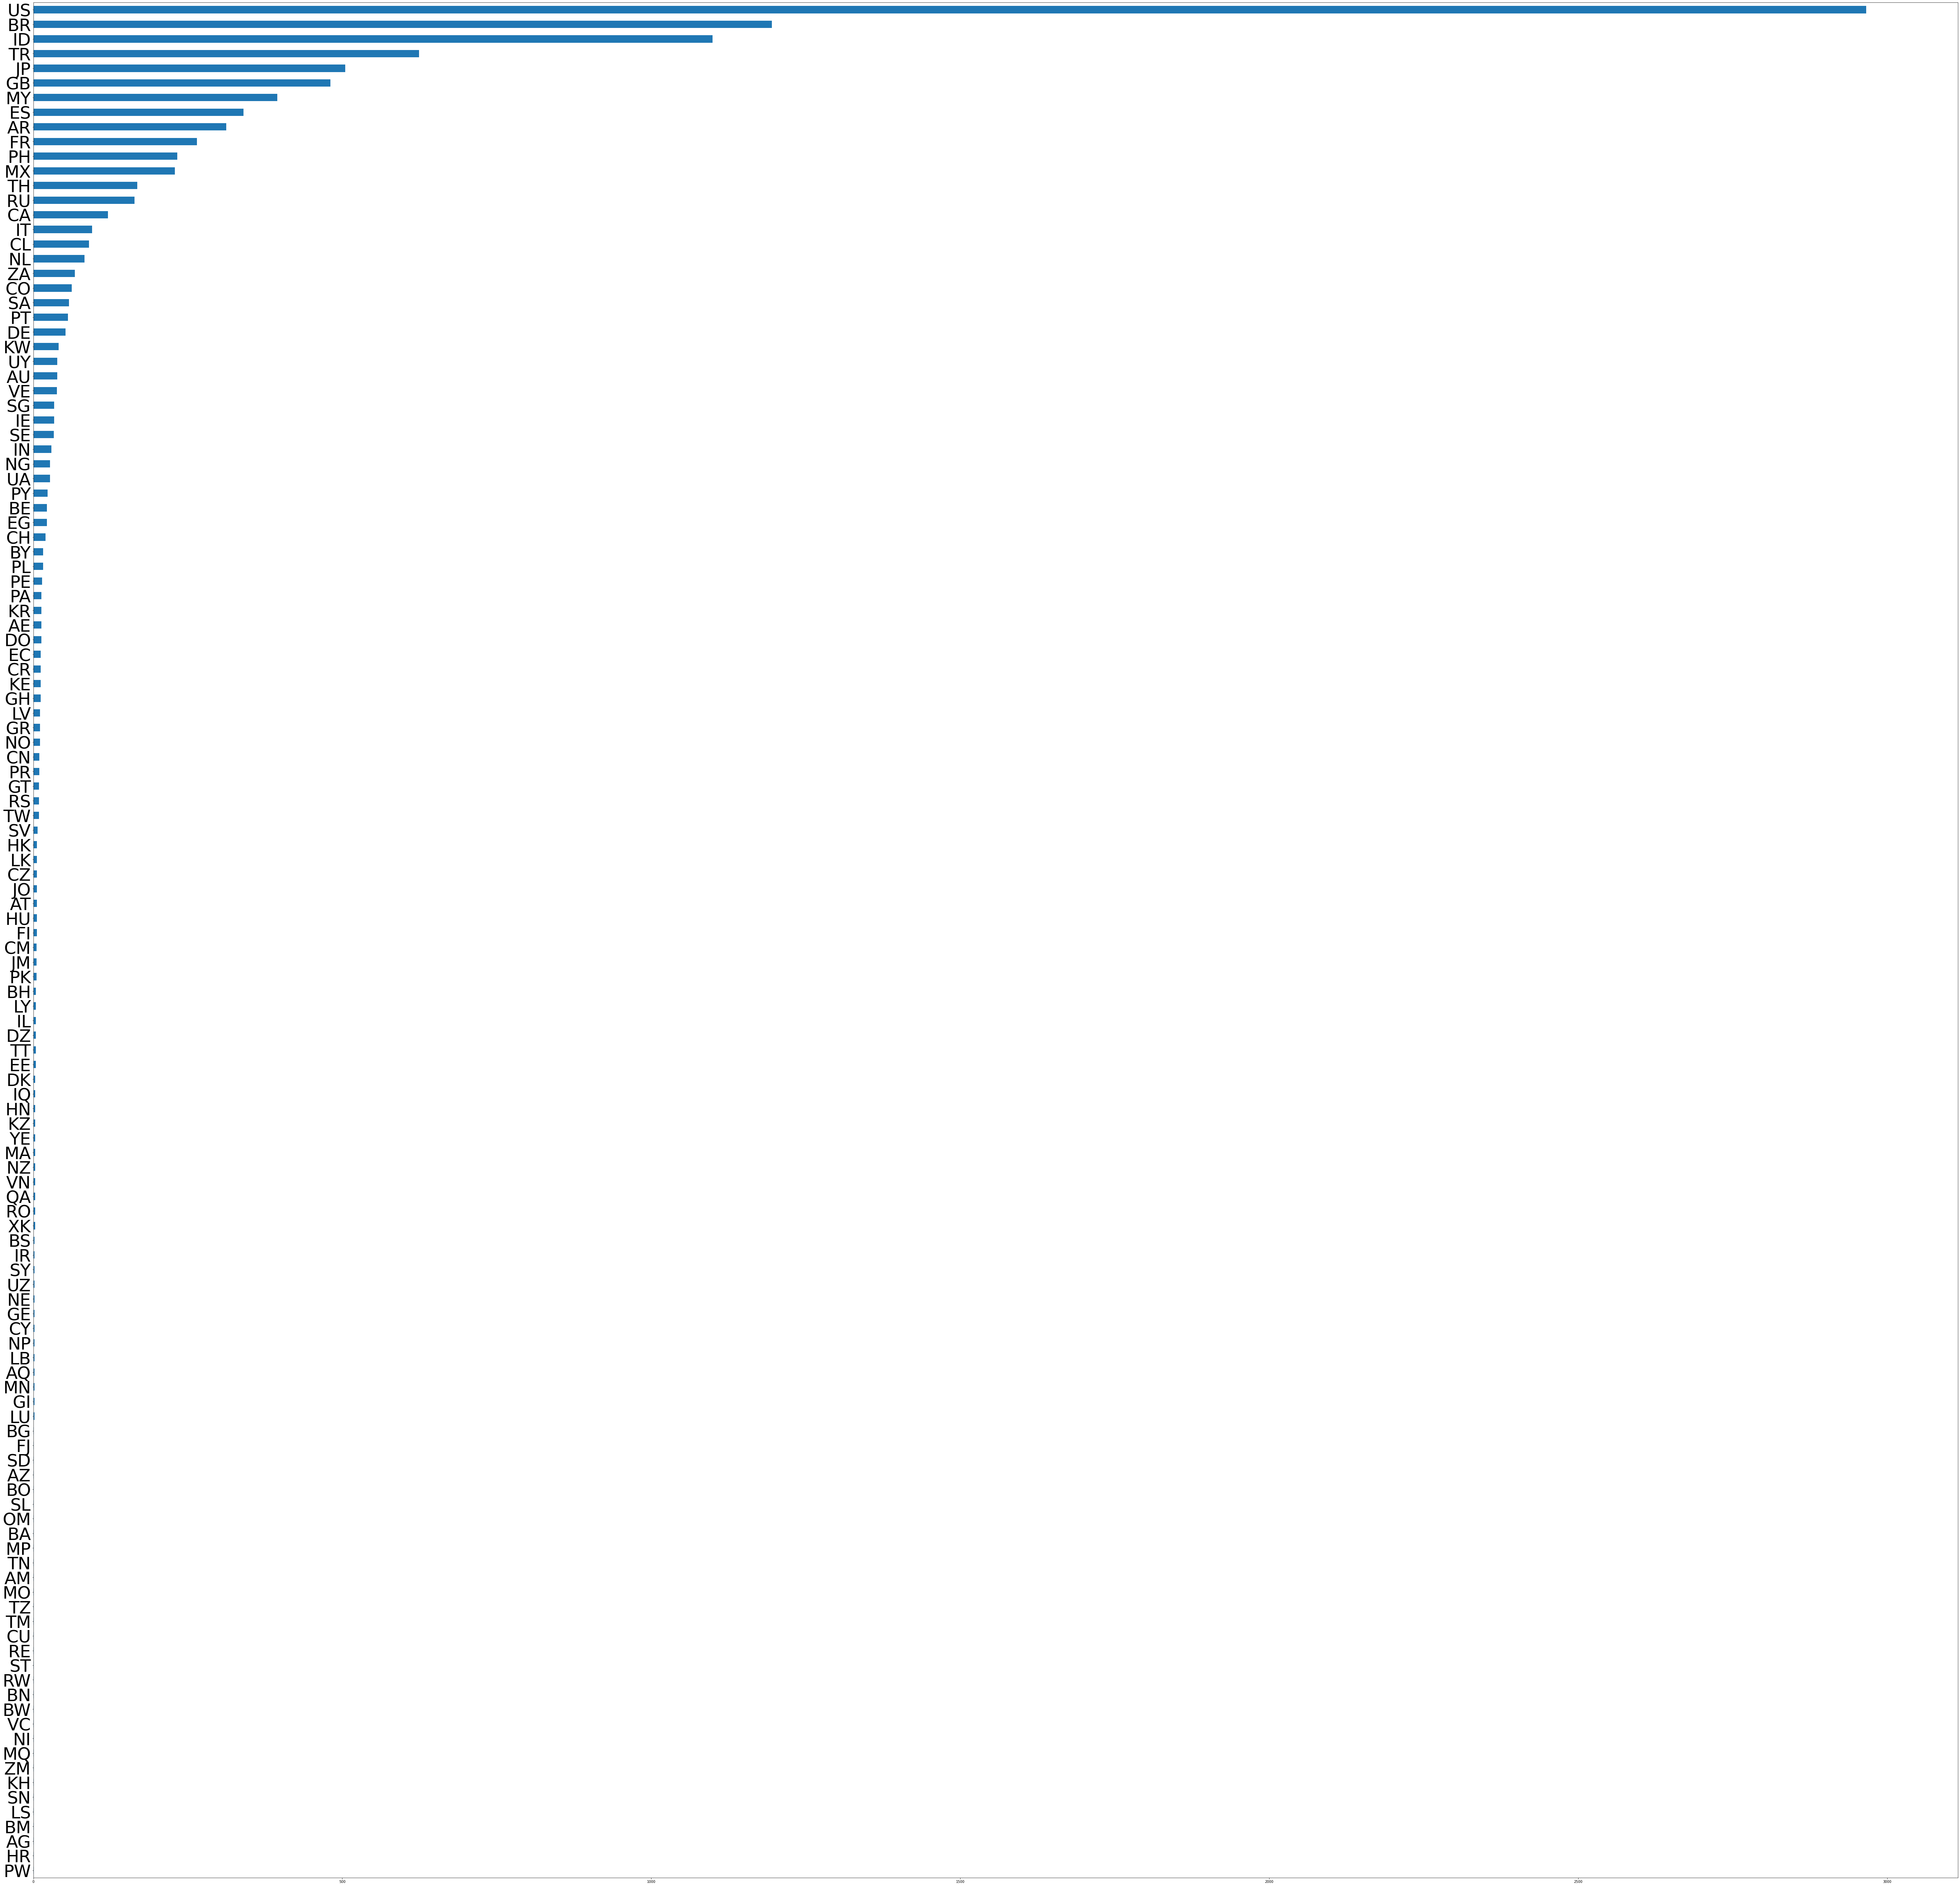

In [ ]:
plt.figure(figsize=(100,100))
plt.rc('ytick', labelsize=50)  
df['Country'].value_counts().sort_values().plot(kind = 'barh')

In [ ]:
sorted(pd.unique(df['Date']))

['2013-01-01',
 '2013-01-02',
 '2013-01-03',
 '2013-01-04',
 '2013-01-05',
 '2013-01-06',
 '2013-01-07',
 '2013-01-08',
 '2013-01-09',
 '2013-01-10',
 '2013-01-11',
 '2013-01-12',
 '2013-01-13',
 '2013-01-14',
 '2013-01-15',
 '2013-01-16',
 '2013-01-17',
 '2013-01-18',
 '2013-01-19',
 '2013-01-20',
 '2013-01-21',
 '2013-01-22',
 '2013-01-23',
 '2013-01-24',
 '2013-01-25',
 '2013-01-26',
 '2013-01-27',
 '2013-01-28',
 '2013-01-29',
 '2013-01-30',
 '2013-01-31',
 '2013-02-01',
 '2013-02-02',
 '2013-02-03',
 '2013-02-04',
 '2013-02-05',
 '2013-02-06',
 '2013-02-07',
 '2013-02-08',
 '2013-02-09',
 '2013-02-10',
 '2013-02-11',
 '2013-02-12',
 '2013-02-13',
 '2013-02-14',
 '2013-02-15',
 '2013-02-16',
 '2013-02-17',
 '2013-02-18',
 '2013-02-19',
 '2013-02-20',
 '2013-02-21',
 '2013-02-22',
 '2013-02-23',
 '2013-02-24',
 '2013-02-25',
 '2013-02-26',
 '2013-02-27',
 '2013-02-28',
 '2013-03-01',
 '2013-03-02',
 '2013-03-03',
 '2013-03-04',
 '2013-03-05',
 '2013-03-06',
 '2013-03-07',
 '2013-03-

In [ ]:
sorted(pd.unique(df['Date']))[0]

'2013-01-01'

In [ ]:
sorted(pd.unique(df['Date']))[1331]

'2016-09-11'

In [ ]:
pd.unique(df['Country'])

array(['TR', 'NL', 'US', 'GB', 'RS', 'MX', 'CA', 'MY', 'BR', 'ID', 'IE',
       'RU', 'HU', 'FR', 'ES', 'CL', 'JP', 'IT', 'SE', 'BY', 'LU', 'PT',
       'BE', 'DE', 'FI', 'NO', 'CH', 'LV', 'EE', 'UA', 'AT', nan, 'ZA',
       'AM', 'XK', 'PL', 'CO', 'TH', 'AR', 'PH', 'SA', 'NG', 'IN', 'EG',
       'JO', 'EC', 'YE', 'LK', 'UY', 'KW', 'QA', 'PY', 'AU', 'SN', 'HN',
       'CN', 'PA', 'SG', 'VC', 'VE', 'TW', 'KE', 'TZ', 'TT', 'BH', 'PR',
       'PE', 'AE', 'LB', 'OM', 'PK', 'BS', 'GH', 'DO', 'UZ', 'DK', 'GR',
       'LY', 'SV', 'RE', 'MQ', 'JM', 'CR', 'KR', 'MP', 'IQ', 'IR', 'GT',
       'MN', 'GE', 'NI', 'BN', 'HK', 'DZ', 'CM', 'GI', 'RO', 'SY', 'SL',
       'IL', 'MA', 'CZ', 'AZ', 'HR', 'BW', 'NP', 'AG', 'CY', 'VN', 'TN',
       'RW', 'BA', 'NZ', 'LS', 'BO', 'NE', 'MO', 'ST', 'BG', 'FJ', 'KZ',
       'CU', 'TM', 'SD', 'AQ', 'ZM', 'KH', 'BM', 'PW'], dtype=object)

In [ ]:
!pip3 install spacy
!pip3 install spacy_universal_sentence_encoder
!pip install spacy-universal-sentence-encoder[multi]
!python -m spacy download en
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 4.3MB 9.4MB/s 
2021-05-30 19:18:18.857254: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.7MB 223kB/s 
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2021-05-30 19:18:26.657725: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 778.8MB 24kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load('en_core_web_sm')  # 1
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True) #2
for i in range(0, len(df['Tweet'])):
  doc = nlp(df['Tweet'][i]) #3
  detect_language = doc._.language #4
  print(detect_language)

Streaming output truncated to the last 5000 lines.
{'language': 'lt', 'score': 0.8571380288723175}
{'language': 'en', 'score': 0.8571400924216458}
{'language': 'it', 'score': 0.9999965457941107}
{'language': 'pt', 'score': 0.9999949037880784}
{'language': 'en', 'score': 0.9999970447691097}
{'language': 'id', 'score': 0.9999977164887182}
{'language': 'tr', 'score': 0.9999974275114972}
{'language': 'pt', 'score': 0.9999974713697155}
{'language': 'en', 'score': 0.9999962653138699}
{'language': 'so', 'score': 0.714284087877142}
{'language': 'en', 'score': 0.9999975011555609}
{'language': 'pt', 'score': 0.9999968779920054}
{'language': 'pt', 'score': 0.9999951219478762}
{'language': 'es', 'score': 0.9999948826146969}
{'language': 'en', 'score': 0.9999956277817329}
{'language': 'ja', 'score': 0.9999999999832557}
{'language': 'ru', 'score': 0.9999960671901302}
{'language': 'pt', 'score': 0.9999958761982799}
{'language': 'fr', 'score': 0.9999986021762031}
{'language': 'en', 'score': 0.99999451

In [ ]:
#functions used to process text and create the required TFIDF and Doc2vec Matrices
def remove_punctuation(in_text):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(in_text))
    return text

# Pre-process dataset to lower case it
def lower_case(in_text):
    # Convert to lowercase
    text = in_text.lower()    
    return text

# Pre-process dataset to remove special characters and digits
def remove_special_chars_and_digits(in_text):
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",in_text)
    return text

# Pre-process dataset to remove tags
def remove_tags(in_text):    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",in_text)
    return text
# Remove stop words
def remove_stop_words(in_text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(in_text)  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = "" 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence = filtered_sentence + " "+ w

    return filtered_sentence

def clean_doc(text):
    text = remove_punctuation(text)
    text = remove_special_chars_and_digits(text)
    text = lower_case(text)
    return text

In [ ]:
pip install spacy_universal_sentence_encoder

     |████████████████████████████████| 12.8MB 246kB/s 
     |████████████████████████████████| 9.1MB 41.9MB/s 
     |████████████████████████████████| 1.1MB 39.0MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 460kB 46.7MB/s 
     |████████████████████████████████| 122kB 60.3MB/s 
  Created wheel for spacy-universal-sentence-encoder: filename=spacy_universal_sentence_encoder-0.4.3-cp37-none-any.whl size=14759 sha256=d0f61bbb6bedec9aa04bf01aaeaa0b52023c36800f7a4287651fd3e7f615c228
  Stored in directory: /root/.cache/pip/wheels/d6/e9/a3/5251c6bd4393d7cd896aa41315bf12bf2606b0255cba14f85b
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=047696b9e68edaceca4765f446b24d06b74542bba8b08d94c1b392eaca53361c
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built spacy-universal-sentence-encoder smart-open
  Found existing installat

In [ ]:
#adding two columns to the dataframe to store the processed text and tokenized text
df['processed_text'] = df['Tweet'].apply(lambda x: clean_doc(x))
data_unprocessed=df['Tweet']
#final_processed_text = [' '.join(x) for x in data['processed_text']]
titles = df['Country'].tolist()

In [ ]:
import tensorflow_text
import spacy_universal_sentence_encoder
nlp = spacy_universal_sentence_encoder.load_model('xx_use_lg')

Downloaded https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3, Total size: 334.32MB



In [ ]:
import spacy
nlp_pos = spacy.load("en_core_web_lg")

In [ ]:
docs=[]
for text in df['processed_text']:
    doc = nlp(text)
    docs.append(doc)

for text in df['processed_text']:
    doc = nlp_pos(text)
    # Analyze syntax
    print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
    print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

    # Find named entities, phrases and concepts
    for entity in doc.ents:
        print(entity.text, entity.label_)

Streaming output truncated to the last 5000 lines.
Noun phrases: ['i', 'wave academia navegantes', 'centro navegantes', 'k nn']
Verbs: ['m']
Noun phrases: ['something', 'a female hope', 'i', 'this beautiful lady justice https', 't', 'xtoj', 'zbr']
Verbs: ['start', 'paint', 'do']
first ORDINAL
Noun phrases: ['gt npressure mb rising nvisibility km gt km']
Verbs: ['nhumidity', 'mb', 'rise']
Noun phrases: ['concerto de natal da orquestra gape orquestra orchestra music classic love violin xmas https', 't', 'co', 'vvzizznnrs']
Verbs: []
Noun phrases: ['mi rcoles comper zapotlan factory https t co']
Verbs: ['lima']
Noun phrases: ['em', 'ossc', 'nossa senhora da concei', 'p']
Verbs: ['miss']
Noun phrases: ['a photo dewan biru unisel https t']
Verbs: ['post']
jo hs PERSON
Noun phrases: ['i', 'centro', 'profissional barrashopping', 'rio de janeiro rj https', 't co ujhievkfs']
Verbs: ['m']
Noun phrases: [' varkinghamdacks apa kh yg d baca t']
Verbs: []
Noun phrases: ['an larla', 'dolu benimle ber

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(df['processed_text'])

X_train = tokenizer.texts_to_sequences(df['processed_text'][0:8401])
X_test = tokenizer.texts_to_sequences(df['processed_text'][8402:10501])
X_val = tokenizer.texts_to_sequences(df['processed_text'][7351:10501])
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(docs[0])
print(X_test[0])

bug n bulusmami lazimdiii
[24, 359, 87, 17, 279, 3, 1, 2]


In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           1699750   
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                50010     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,749,771
Trainable params: 1,749,771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, 
          df['Definitely English'][0:8401],
                    epochs=20,
                    validation_data=(X_val, df['Definitely English'][7351:10501]),
                    batch_size=10)


Epoch 1/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1282 - accuracy: 0.9513 - val_loss: 0.2744 - val_accuracy: 0.8987
Epoch 2/20
841/841 [==============================] - 13s 16ms/step - loss: 0.1228 - accuracy: 0.9529 - val_loss: 0.2878 - val_accuracy: 0.9035
Epoch 3/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1192 - accuracy: 0.9539 - val_loss: 0.2956 - val_accuracy: 0.9029
Epoch 4/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1154 - accuracy: 0.9551 - val_loss: 0.3226 - val_accuracy: 0.9010
Epoch 5/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1136 - accuracy: 0.9560 - val_loss: 0.3244 - val_accuracy: 0.9032
Epoch 6/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1100 - accuracy: 0.9552 - val_loss: 0.3470 - val_accuracy: 0.9035
Epoch 7/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1106 - accuracy: 0.9554 - val_loss: 0.3599 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, df['Definitely English'][0:8401], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, df['Definitely English'][8402:10501], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9632
Testing Accuracy:  0.8752


# MODEL 2

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           1699750   
_________________________________________________________________
flatten_4 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                320064    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 2,024,039
Trainable params: 2,024,039
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, 
          df['Definitely English'][0:8401],
                    epochs=20,
                    validation_data=(X_val, df['Definitely English'][7351:10501]),
                    batch_size=10)

Epoch 1/20
841/841 [==============================] - 15s 17ms/step - loss: 0.4306 - accuracy: 0.7739 - val_loss: 0.2468 - val_accuracy: 0.9003
Epoch 2/20
841/841 [==============================] - 14s 16ms/step - loss: 0.2006 - accuracy: 0.9280 - val_loss: 0.2351 - val_accuracy: 0.9029
Epoch 3/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1834 - accuracy: 0.9322 - val_loss: 0.2373 - val_accuracy: 0.8971
Epoch 4/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1599 - accuracy: 0.9413 - val_loss: 0.2344 - val_accuracy: 0.9003
Epoch 5/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1514 - accuracy: 0.9447 - val_loss: 0.2423 - val_accuracy: 0.8997
Epoch 6/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1417 - accuracy: 0.9433 - val_loss: 0.2590 - val_accuracy: 0.8971
Epoch 7/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1281 - accuracy: 0.9514 - val_loss: 0.2710 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, df['Definitely English'][0:8401], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, df['Definitely English'][8402:10501], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9632
Testing Accuracy:  0.8690


# MODEL 3

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 50)           1699750   
_________________________________________________________________
flatten_5 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                320064    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 2,028,199
Trainable params: 2,028,199
Non-trainable params: 0
____________________________________________

In [ ]:
model.fit(X_train, 
          df['Definitely English'][0:8401],
                    epochs=20,
                    validation_data=(X_val, df['Definitely English'][7351:10501]),
                    batch_size=10)

Epoch 1/20
841/841 [==============================] - 15s 17ms/step - loss: 0.3990 - accuracy: 0.8018 - val_loss: 0.2517 - val_accuracy: 0.9038
Epoch 2/20
841/841 [==============================] - 14s 16ms/step - loss: 0.2038 - accuracy: 0.9262 - val_loss: 0.2443 - val_accuracy: 0.8962
Epoch 3/20
841/841 [==============================] - 13s 16ms/step - loss: 0.1760 - accuracy: 0.9374 - val_loss: 0.2306 - val_accuracy: 0.9048
Epoch 4/20
841/841 [==============================] - 13s 16ms/step - loss: 0.1642 - accuracy: 0.9386 - val_loss: 0.2454 - val_accuracy: 0.9013
Epoch 5/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1545 - accuracy: 0.9426 - val_loss: 0.2628 - val_accuracy: 0.8984
Epoch 6/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1384 - accuracy: 0.9440 - val_loss: 0.2764 - val_accuracy: 0.8924
Epoch 7/20
841/841 [==============================] - 13s 16ms/step - loss: 0.1310 - accuracy: 0.9473 - val_loss: 0.2751 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, df['Definitely English'][0:8401], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, df['Definitely English'][8402:10501], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9579
Testing Accuracy:  0.8766


# MODEL 4

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 50)           1699750   
_________________________________________________________________
flatten_7 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               640128    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 2,340,007
Trainable params: 2,340,007
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, 
          df['Definitely English'][0:8401],
                    epochs=20,
                    validation_data=(X_val, df['Definitely English'][7351:10501]),
                    batch_size=10)

Epoch 1/20
841/841 [==============================] - 15s 16ms/step - loss: 0.4373 - accuracy: 0.7819 - val_loss: 0.2525 - val_accuracy: 0.8917
Epoch 2/20
841/841 [==============================] - 14s 17ms/step - loss: 0.2023 - accuracy: 0.9248 - val_loss: 0.2427 - val_accuracy: 0.8987
Epoch 3/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1835 - accuracy: 0.9331 - val_loss: 0.2462 - val_accuracy: 0.8968
Epoch 4/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1671 - accuracy: 0.9395 - val_loss: 0.2356 - val_accuracy: 0.9035
Epoch 5/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1531 - accuracy: 0.9467 - val_loss: 0.2445 - val_accuracy: 0.9057
Epoch 6/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1547 - accuracy: 0.9426 - val_loss: 0.2497 - val_accuracy: 0.9019
Epoch 7/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1374 - accuracy: 0.9485 - val_loss: 0.2565 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, df['Definitely English'][0:8401], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, df['Definitely English'][8402:10501], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9662
Testing Accuracy:  0.8685


# MODEL 5

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 50)           1699750   
_________________________________________________________________
flatten_8 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                320064    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 2,019,879
Trainable params: 2,019,879
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, 
          df['Definitely English'][0:8401],
                    epochs=20,
                    validation_data=(X_val, df['Definitely English'][7351:10501]),
                    batch_size=10)

Epoch 1/20
841/841 [==============================] - 15s 17ms/step - loss: 0.3952 - accuracy: 0.8187 - val_loss: 0.2507 - val_accuracy: 0.8968
Epoch 2/20
841/841 [==============================] - 14s 16ms/step - loss: 0.2011 - accuracy: 0.9305 - val_loss: 0.2437 - val_accuracy: 0.8965
Epoch 3/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1739 - accuracy: 0.9385 - val_loss: 0.2367 - val_accuracy: 0.8997
Epoch 4/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1666 - accuracy: 0.9369 - val_loss: 0.2475 - val_accuracy: 0.9032
Epoch 5/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1595 - accuracy: 0.9396 - val_loss: 0.2536 - val_accuracy: 0.9029
Epoch 6/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1493 - accuracy: 0.9437 - val_loss: 0.2583 - val_accuracy: 0.9025
Epoch 7/20
841/841 [==============================] - 13s 16ms/step - loss: 0.1324 - accuracy: 0.9503 - val_loss: 0.2719 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, df['Definitely English'][0:8401], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, df['Definitely English'][8402:10501], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9652
Testing Accuracy:  0.8771


# MODEL 6

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 50)           1699750   
_________________________________________________________________
flatten_9 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               640128    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 2,356,519
Trainable params: 2,356,519
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, 
          df['Definitely English'][0:8401],
                    epochs=20,
                    validation_data=(X_val, df['Definitely English'][7351:10501]),
                    batch_size=10)

Epoch 1/20
841/841 [==============================] - 15s 17ms/step - loss: 0.3924 - accuracy: 0.8061 - val_loss: 0.2448 - val_accuracy: 0.9019
Epoch 2/20
841/841 [==============================] - 14s 16ms/step - loss: 0.2016 - accuracy: 0.9303 - val_loss: 0.2489 - val_accuracy: 0.8937
Epoch 3/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1778 - accuracy: 0.9363 - val_loss: 0.2404 - val_accuracy: 0.8952
Epoch 4/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1647 - accuracy: 0.9387 - val_loss: 0.2567 - val_accuracy: 0.8956
Epoch 5/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1452 - accuracy: 0.9446 - val_loss: 0.2482 - val_accuracy: 0.8987
Epoch 6/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1412 - accuracy: 0.9441 - val_loss: 0.2827 - val_accuracy: 0.8883
Epoch 7/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1180 - accuracy: 0.9515 - val_loss: 0.2940 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, df['Definitely English'][0:8401], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, df['Definitely English'][8402:10501], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9650
Testing Accuracy:  0.8823


# MODEL 7

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 50)           1699750   
_________________________________________________________________
flatten_10 (Flatten)         (None, 5000)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               640128    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 129       
Total params: 2,373,031
Trainable params: 2,373,031
Non-trainable params: 0
___________________________________________

In [ ]:
model.fit(X_train, 
          df['Definitely English'][0:8401],
                    epochs=20,
                    validation_data=(X_val, df['Definitely English'][7351:10501]),
                    batch_size=10)

Epoch 1/20
841/841 [==============================] - 15s 17ms/step - loss: 0.3998 - accuracy: 0.7860 - val_loss: 0.2448 - val_accuracy: 0.8990
Epoch 2/20
841/841 [==============================] - 14s 16ms/step - loss: 0.2008 - accuracy: 0.9275 - val_loss: 0.2379 - val_accuracy: 0.8978
Epoch 3/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1820 - accuracy: 0.9347 - val_loss: 0.2761 - val_accuracy: 0.8806
Epoch 4/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1695 - accuracy: 0.9372 - val_loss: 0.2415 - val_accuracy: 0.8956
Epoch 5/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1447 - accuracy: 0.9452 - val_loss: 0.2707 - val_accuracy: 0.8943
Epoch 6/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1358 - accuracy: 0.9474 - val_loss: 0.2862 - val_accuracy: 0.9019
Epoch 7/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1304 - accuracy: 0.9475 - val_loss: 0.3253 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, df['Definitely English'][0:8401], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, df['Definitely English'][8402:10501], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9654
Testing Accuracy:  0.8723


# MODEL 8

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 50)           1699750   
_________________________________________________________________
flatten_11 (Flatten)         (None, 5000)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               1280256   
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 257       
Total params: 2,980,263
Trainable params: 2,980,263
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, 
          df['Definitely English'][0:8401],
                    epochs=20,
                    validation_data=(X_val, df['Definitely English'][7351:10501]),
                    batch_size=10)

Epoch 1/20
841/841 [==============================] - 15s 17ms/step - loss: 0.3871 - accuracy: 0.8177 - val_loss: 0.2610 - val_accuracy: 0.8959
Epoch 2/20
841/841 [==============================] - 14s 16ms/step - loss: 0.2051 - accuracy: 0.9269 - val_loss: 0.2390 - val_accuracy: 0.9057
Epoch 3/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1806 - accuracy: 0.9357 - val_loss: 0.2440 - val_accuracy: 0.8971
Epoch 4/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1622 - accuracy: 0.9426 - val_loss: 0.2508 - val_accuracy: 0.9032
Epoch 5/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1509 - accuracy: 0.9446 - val_loss: 0.2528 - val_accuracy: 0.9073
Epoch 6/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1372 - accuracy: 0.9470 - val_loss: 0.2651 - val_accuracy: 0.9029
Epoch 7/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1321 - accuracy: 0.9495 - val_loss: 0.2708 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, df['Definitely English'][0:8401], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, df['Definitely English'][8402:10501], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9571
Testing Accuracy:  0.8385


# MODEL 9

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 50)           1699750   
_________________________________________________________________
flatten_12 (Flatten)         (None, 5000)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               1280256   
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 257       
Total params: 3,046,055
Trainable params: 3,046,055
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, 
          df['Definitely English'][0:8401],
                    epochs=20,
                    validation_data=(X_val, df['Definitely English'][7351:10501]),
                    batch_size=10)

Epoch 1/20
841/841 [==============================] - 15s 17ms/step - loss: 0.3827 - accuracy: 0.8225 - val_loss: 0.2410 - val_accuracy: 0.9006
Epoch 2/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1971 - accuracy: 0.9292 - val_loss: 0.2420 - val_accuracy: 0.9032
Epoch 3/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1742 - accuracy: 0.9343 - val_loss: 0.2420 - val_accuracy: 0.8956
Epoch 4/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1557 - accuracy: 0.9395 - val_loss: 0.2432 - val_accuracy: 0.8984
Epoch 5/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1420 - accuracy: 0.9443 - val_loss: 0.2662 - val_accuracy: 0.8987
Epoch 6/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1353 - accuracy: 0.9463 - val_loss: 0.3984 - val_accuracy: 0.8717
Epoch 7/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1292 - accuracy: 0.9504 - val_loss: 0.3515 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, df['Definitely English'][0:8401], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, df['Definitely English'][8402:10501], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9662
Testing Accuracy:  0.8704


# MODEL 10

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 50)           1699750   
_________________________________________________________________
flatten_13 (Flatten)         (None, 5000)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               1280256   
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_35 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 257       
Total params: 3,111,847
Trainable params: 3,111,847
Non-trainable params: 0
___________________________________________

In [ ]:
model.fit(X_train, 
          df['Definitely English'][0:8401],
                    epochs=20,
                    validation_data=(X_val, df['Definitely English'][7351:10501]),
                    batch_size=10)

Epoch 1/20
841/841 [==============================] - 16s 17ms/step - loss: 0.3645 - accuracy: 0.8250 - val_loss: 0.2518 - val_accuracy: 0.8914
Epoch 2/20
841/841 [==============================] - 14s 16ms/step - loss: 0.1968 - accuracy: 0.9312 - val_loss: 0.2404 - val_accuracy: 0.8975
Epoch 3/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1929 - accuracy: 0.9291 - val_loss: 0.2509 - val_accuracy: 0.9035
Epoch 4/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1596 - accuracy: 0.9405 - val_loss: 0.2730 - val_accuracy: 0.8981
Epoch 5/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1399 - accuracy: 0.9489 - val_loss: 0.2466 - val_accuracy: 0.8902
Epoch 6/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1384 - accuracy: 0.9452 - val_loss: 0.2977 - val_accuracy: 0.9013
Epoch 7/20
841/841 [==============================] - 14s 17ms/step - loss: 0.1219 - accuracy: 0.9526 - val_loss: 0.3013 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, df['Definitely English'][0:8401], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, df['Definitely English'][8402:10501], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9649
Testing Accuracy:  0.8776


# MODEL 11

In [ ]:
from keras.layers import LSTM, Bidirectional, SimpleRNN
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(256)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 50)           1699750   
_________________________________________________________________
bidirectional_9 (Bidirection (None, 100, 512)          628736    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 512)               1574912   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 4,034,983
Trainable params: 4,034,983
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, 
          df['Definitely English'][0:8401],
                    epochs=20,
                    validation_data=(X_val, df['Definitely English'][7351:10501]),
                    batch_size=10)

Epoch 1/20
841/841 [==============================] - 64s 44ms/step - loss: 0.3441 - accuracy: 0.8539 - val_loss: 0.2609 - val_accuracy: 0.8803
Epoch 2/20
841/841 [==============================] - 35s 42ms/step - loss: 0.2075 - accuracy: 0.9230 - val_loss: 0.2522 - val_accuracy: 0.8994
Epoch 3/20
841/841 [==============================] - 35s 41ms/step - loss: 0.1808 - accuracy: 0.9370 - val_loss: 0.2560 - val_accuracy: 0.8905
Epoch 4/20
841/841 [==============================] - 35s 42ms/step - loss: 0.1830 - accuracy: 0.9322 - val_loss: 0.2517 - val_accuracy: 0.8914
Epoch 5/20
841/841 [==============================] - 36s 42ms/step - loss: 0.1733 - accuracy: 0.9367 - val_loss: 0.2570 - val_accuracy: 0.8962
Epoch 6/20
841/841 [==============================] - 35s 42ms/step - loss: 0.1890 - accuracy: 0.9314 - val_loss: 0.2420 - val_accuracy: 0.9016
Epoch 7/20
841/841 [==============================] - 35s 42ms/step - loss: 0.1729 - accuracy: 0.9346 - val_loss: 0.2446 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, df['Definitely English'][0:8401], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, df['Definitely English'][8402:10501], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9591
Testing Accuracy:  0.8814


# MODEL 12

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(SimpleRNN(256,return_sequences=True))
model.add(SimpleRNN(256))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 50)           1699750   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100, 256)          78592     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 1,909,927
Trainable params: 1,909,927
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, 
          df['Definitely English'][0:8401],
                    epochs=20,
                    validation_data=(X_val, df['Definitely English'][7351:10501]),
                    batch_size=10)

Epoch 1/20
841/841 [==============================] - 42s 43ms/step - loss: 0.3601 - accuracy: 0.8381 - val_loss: 0.2577 - val_accuracy: 0.8883
Epoch 2/20
841/841 [==============================] - 35s 41ms/step - loss: 0.2129 - accuracy: 0.9217 - val_loss: 0.2496 - val_accuracy: 0.8949
Epoch 3/20
841/841 [==============================] - 34s 41ms/step - loss: 0.2028 - accuracy: 0.9278 - val_loss: 0.2442 - val_accuracy: 0.8933
Epoch 4/20
841/841 [==============================] - 34s 41ms/step - loss: 0.1956 - accuracy: 0.9282 - val_loss: 0.2430 - val_accuracy: 0.8984
Epoch 5/20
841/841 [==============================] - 34s 41ms/step - loss: 0.1886 - accuracy: 0.9270 - val_loss: 0.3022 - val_accuracy: 0.8952
Epoch 6/20
841/841 [==============================] - 34s 40ms/step - loss: 0.2563 - accuracy: 0.9184 - val_loss: 0.2966 - val_accuracy: 0.8883
Epoch 7/20
841/841 [==============================] - 34s 41ms/step - loss: 0.2155 - accuracy: 0.9295 - val_loss: 0.2561 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, df['Definitely English'][0:8401], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, df['Definitely English'][8402:10501], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9383
Testing Accuracy:  0.8880


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_train)
confusion_matrix(df['Definitely English'][0:8401], y_pred)



/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[4294,  216],
       [ 302, 3589]])

In [ ]:
y_predtest = model.predict_classes(X_test)
confusion_matrix(df['Definitely English'][8402:10501], y_predtest)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[ 771,  134],
       [ 101, 1093]])